In [28]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr 
import netCDF4
import cartopy.crs as ccrs
import math as Math
import matplotlib as mplt
import matplotlib.pyplot as plt
import pylab



In [2]:
np.set_printoptions(suppress=True) 

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
mpl.rcParams['axes.unicode_minus'] = False 

In [3]:
np.set_printoptions(suppress=True) 

nc1 = Dataset("data/imd_1901_2015_rfp25_monthly.nc")

In [4]:
print(nc1.variables)


OrderedDict([('lon', <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (135,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lat', <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (129,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('time', <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    bounds: time_bnds
    units: hours since 1901-1-1 00:00:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (408,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('time_bnds', <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (408, 2)
filling on, default _FillValue of 

In [61]:
print(nc1)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.4
    history: Tue Jul 02 17:39:44 2019: cdo monmean -selyear,1979/2012 imd_1901_2015_rfp25.nc imd_1901_2015_rfp25_monthly.nc
Fri Apr 07 16:07:15 2017: cdo setctomiss,-999.0 -chvar,rf,var260 tmp.nc ind_1901-2015_rfp25.nc
Fri Apr 07 16:07:09 2017: cdo -f nc import_binary rf_grd.ctl tmp.nc
    CDO: Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/cdo)
    dimensions(sizes): lon(135), lat(129), time(408), bnds(2)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float64 time(time), float64 time_bnds(time,bnds), float32 var260(time,lat,lon)
    groups: 



In [62]:
sla = nc1['var260'] 
print (sla)

<class 'netCDF4._netCDF4.Variable'>
float32 var260(time, lat, lon)
    long_name: GRIDDED RAINFALL
    code: 260
    _FillValue: -999.0
    missing_value: -999.0
unlimited dimensions: time
current shape = (408, 129, 135)
filling on


In [64]:
nc1 = xr.open_mfdataset('data/imd_1901_2015_rfp25_monthly*.nc', chunks={'lon': 135, 'lat': 129})
sla = nc1.var260
print (sla)

<xarray.DataArray 'var260' (time: 408, lat: 129, lon: 135)>
dask.array<shape=(408, 129, 135), dtype=float32, chunksize=(408, 129, 135)>
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) datetime64[ns] 1979-01-16 1979-02-14T12:00:00 ... 2012-12-16
Attributes:
    long_name:  GRIDDED RAINFALL
    code:       260


/home/cgmli-12/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/home/cgmli-12/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


In [65]:
cgmli1 = sla.groupby('time.month').mean('time').compute()
print (cgmli1)

<xarray.DataArray 'var260' (month: 12, lat: 129, lon: 135)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


/home/cgmli-12/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/cgmli-12/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


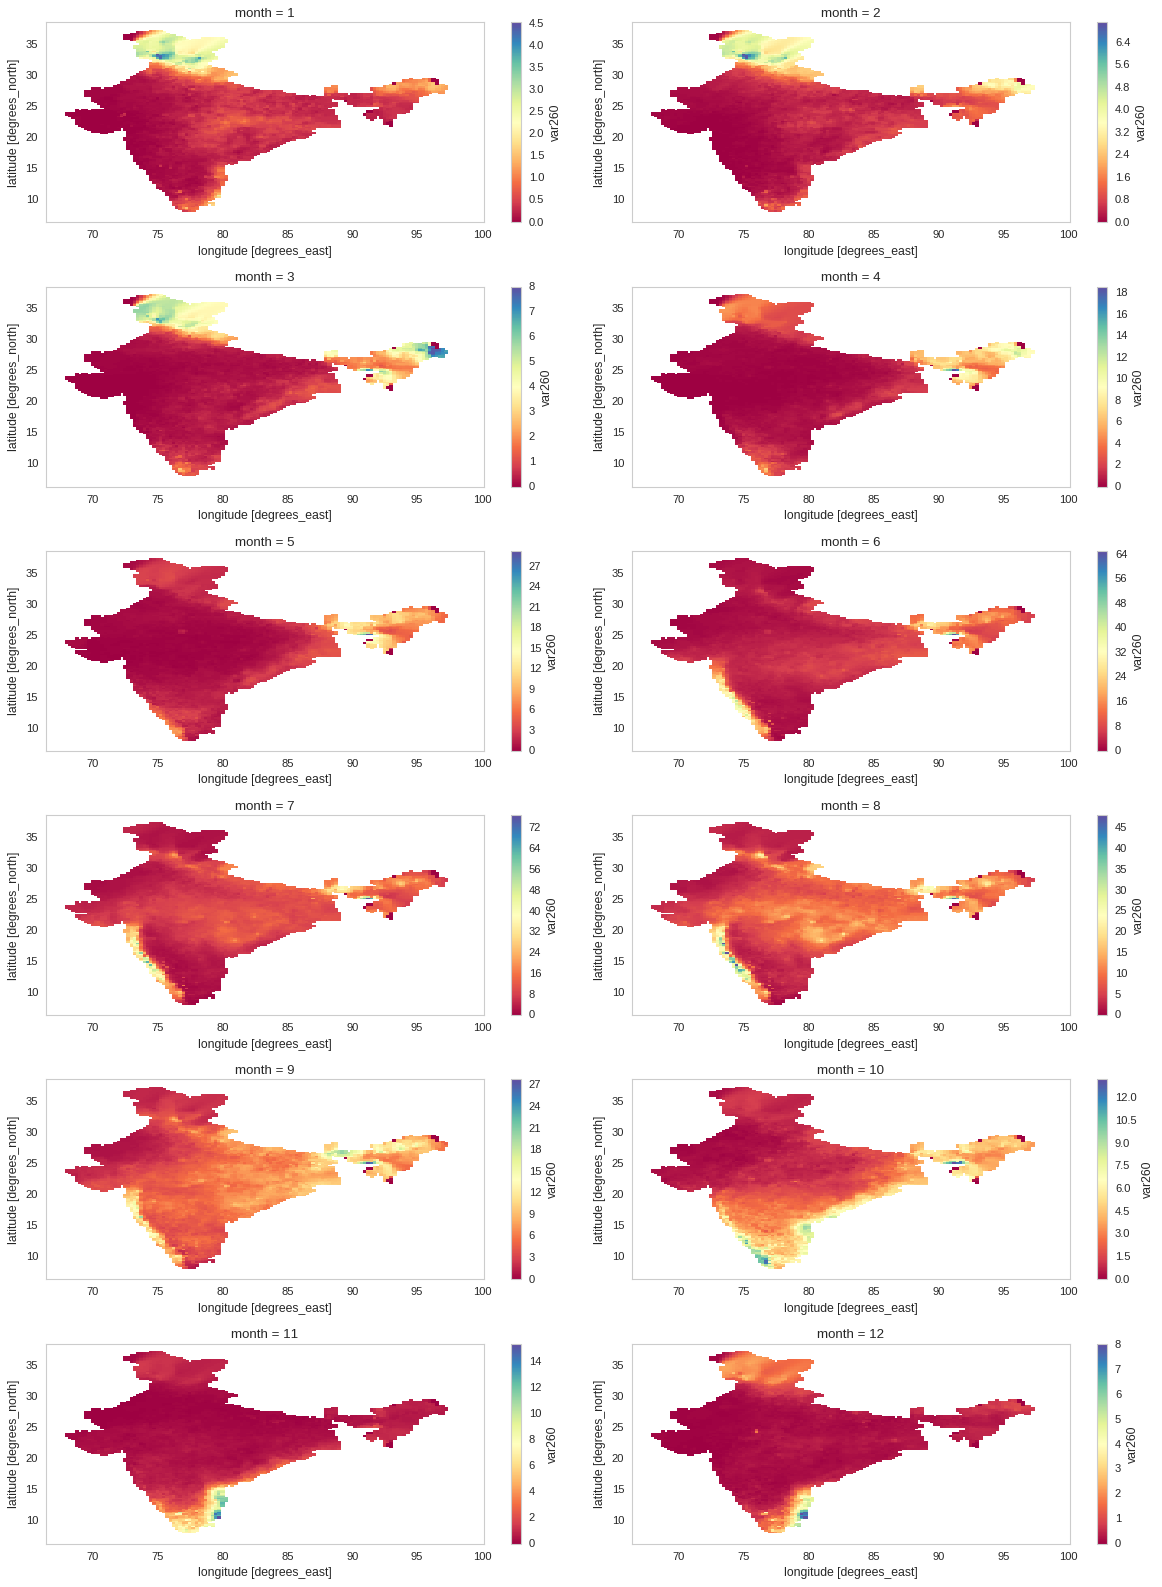

In [72]:
plt.figure(figsize=(15, 20))
for i in range(1, 13):
    ax = plt.subplot(6, 2, i)
    cgmli1.sel(month=i).plot(x='lon', y='lat', cmap='Spectral', ax=ax)
plt.tight_layout()
plt.savefig("figure1.png")

In [5]:
ds = xr.open_dataset('data/imd_1901_2015_rfp25_monthly.nc').load()

/home/cgmli-12/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


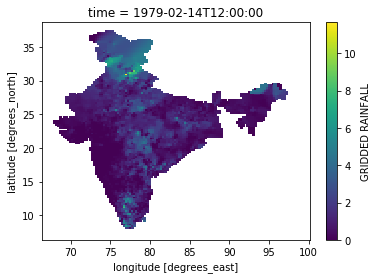

In [6]:
ds.var260[1].plot();

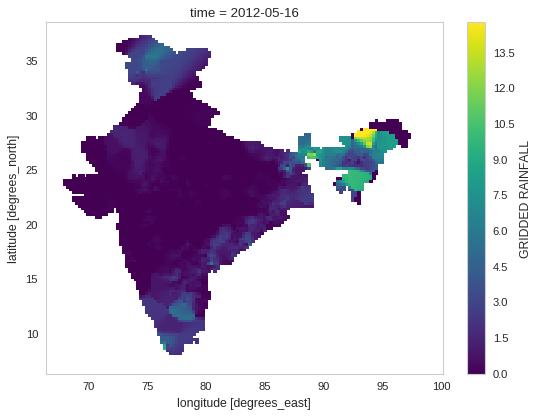

In [58]:
ds.var260[400].plot();
plt.savefig("output.png")

In [23]:
cgmli = ds.var260.isel(time=100)

In [24]:
cgmli

<xarray.DataArray 'var260' (lat: 129, lon: 135)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
    time     datetime64[ns] 1987-05-16
Attributes:
    long_name:  GRIDDED RAINFALL
    code:       260

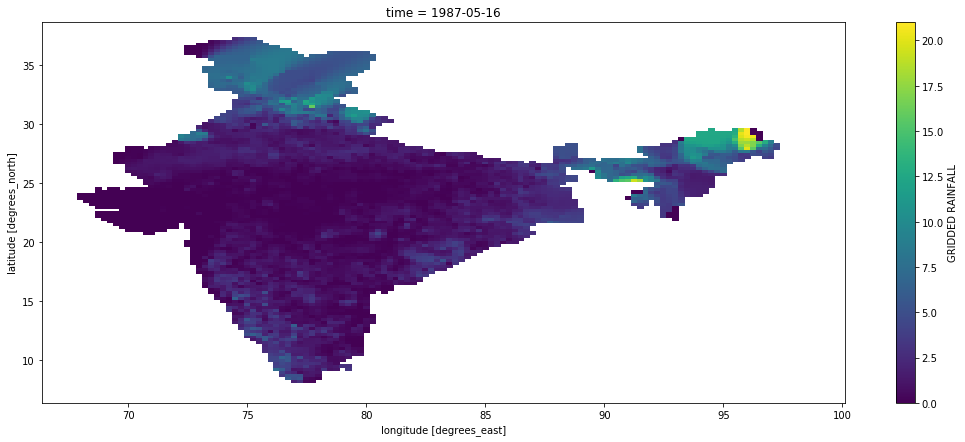

In [25]:
cgmli.plot(figsize=(18,7))


In [45]:
print(plt.style.available)

['Solarize_Light2', '_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'tableau-colorblind10']


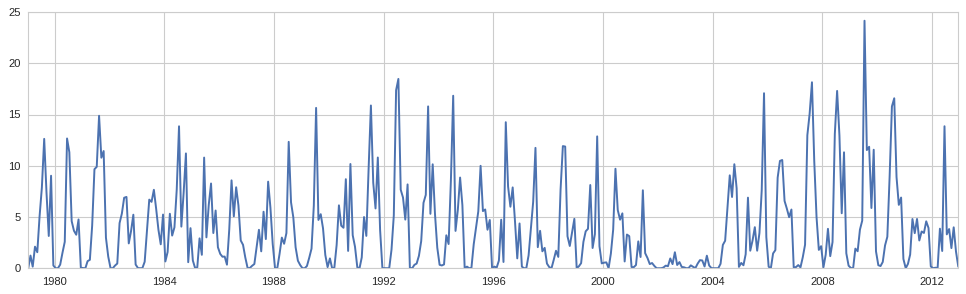

In [54]:
y = ds.var260.isel(lon=40,lat=20)
x = ds.time
plt.figure(figsize=(15,4))
plt.style.use('seaborn-whitegrid')
pylab.plot(x,y)


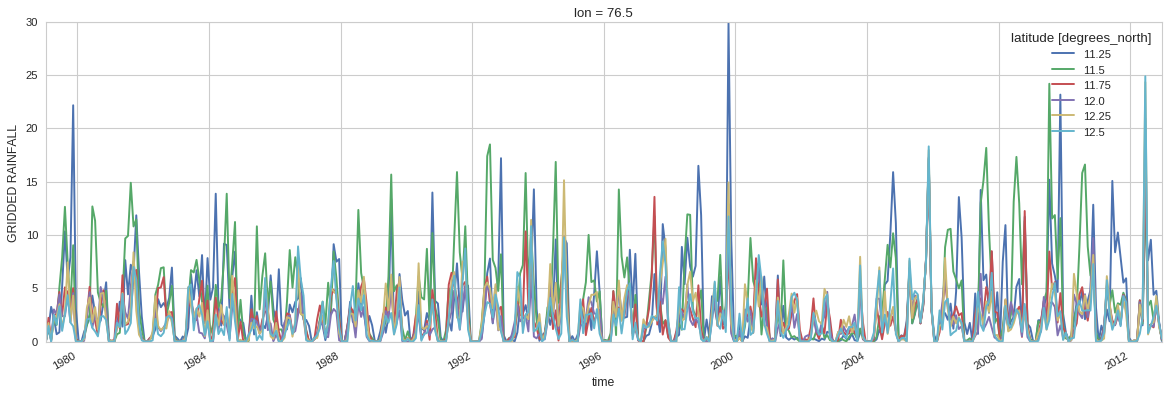

In [60]:
ds.var260.isel(lon=40, lat=slice(19,25)).plot.line(x='time',figsize=(18,5))

In [67]:
t = ds.var260 

In [68]:
g = t.isel()

In [69]:
g.coords

Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) datetime64[ns] 1979-01-16 1979-02-14T12:00:00 ... 2012-12-16

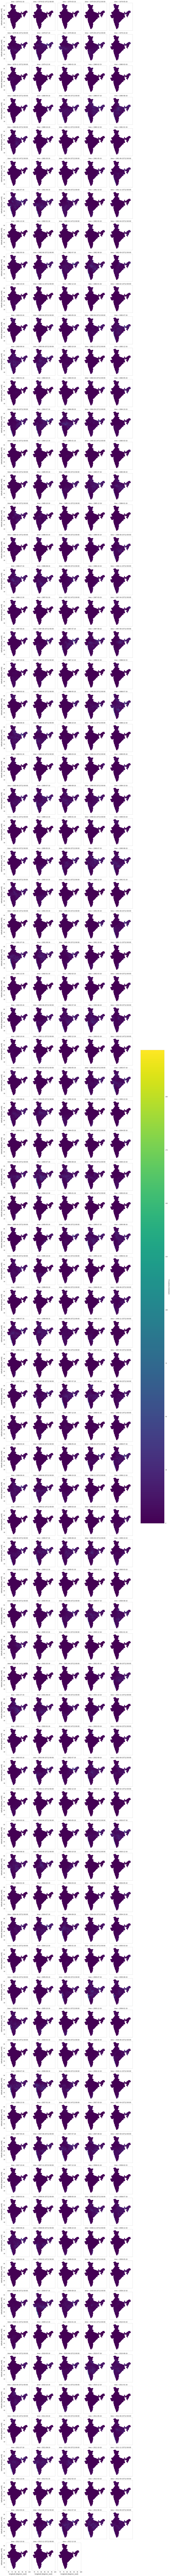

In [71]:
gaurav = g.plot(x='lon', y='lat', col='time', col_wrap=5)
plt.savefig("subplot.png")